# Neural Network

In [1]:
import time
from IPython.display import clear_output

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles 

## Dataset definition and exploration

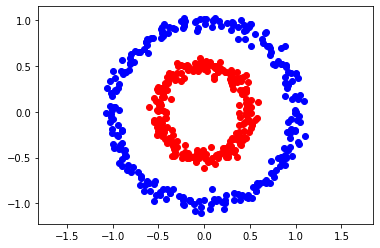

In [2]:
# Examples
n = 500
# Features
p = 2

X, y = make_circles(n_samples=n, factor=0.5, noise=0.05)
y = y[:, np.newaxis]

plt.scatter(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], c='blue')
plt.scatter(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], c='red')
plt.axis('equal')
plt.show()

## Neural network definition

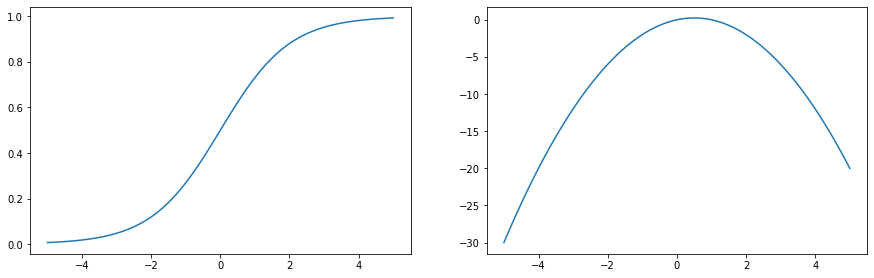

In [3]:
# Sigmoid activation function and its derivative
sigm = (lambda x: 1 / (1 + (np.e ** (-x))), lambda x: x * (1 - x))

_x = np.linspace(-5, 5, 100)
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(221)
ax1.plot(_x, sigm[0](_x))
ax2 = fig.add_subplot(222)
ax2.plot(_x, sigm[1](_x))
plt.show()

In [4]:
# Cost fuction mean squared error and its derivative 
cost_f = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2), lambda Yp, Yr: Yp - Yr)

In [5]:
class neural_layer():
    '''
    Neural layer class
    - n_conn: Number of connections
    - n_neur: Number of neurons
    - act_f: Activation function
    '''
    def __init__(self, n_conn, n_neur, act_f):
        self.act_f = act_f
        self.b = (np.random.rand(1, n_neur) * 2) - 1
        self.W = (np.random.rand(n_conn, n_neur) * 2) - 1        

In [6]:
def create_nn(topology, act_f):
    '''Create a neural network'''
    nn = []
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l], topology[l + 1], act_f))
        
    return nn

def train(neural_net, X, Y, cost_f, lr=0.5, train=True):
    '''Train de neural network'''
    output = [(None, X)]
    
    # Forward pass
    for l, layer in enumerate(neural_net):
        z = output[-1][1] @ neural_net[l].W + neural_net[l].b
        a = neural_net[l].act_f[0](z)
        
        output.append((z, a))
    
    if train:
        # Backward pass
        delta = []
        for l in reversed(range(0, len(neural_net))):
            z = output[l + 1][0]
            a = output[l + 1][1]
            if l == (len(neural_net) - 1):
                # Calculate last layer delta
                delta.insert(0, cost_f[1](a, Y) * neural_net[l].act_f[1](a))
            else:
                # Calculate delta with respect to the previous layer
                delta.insert(0, delta[0] @ _W.T * neural_net[l].act_f[1](a))
                
            _W = neural_net[l].W
            
            # Gradient descent
            neural_net[l].b = neural_net[l].b - np.mean(delta[0], axis=0, keepdims=True) * lr
            neural_net[l].W = neural_net[l].W - ((output[l][1].T @ delta[0]) * lr)
        
        
    return output[-1][1]

## Train process visualization

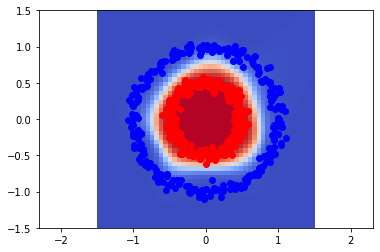

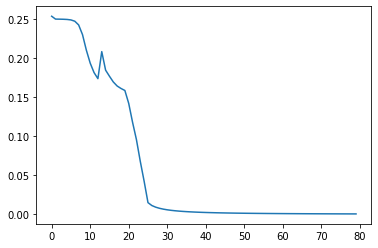

In [7]:
# Number of neurons of each layer in de neural network
topology = [p, 4, 8, 1]

nn = create_nn(topology, sigm)

loss = []

for i in range(2000):
    # Train de neural network
    py = train(nn, X, y, cost_f, lr=0.05)
    
    if i % 25 == 0:
        loss.append(cost_f[0](py, y))
        
        res = 50
        
        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)
        _y = np.zeros((res, res))
        
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _y[i0, i1] = train(nn, np.array([x0, x1]), y, cost_f, train=False)[0][0]
                
        plt.pcolormesh(_x0, _x1, _y, cmap='coolwarm')
        plt.axis('equal')
        
        plt.scatter(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], c='blue')
        plt.scatter(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], c='red')
        
        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)